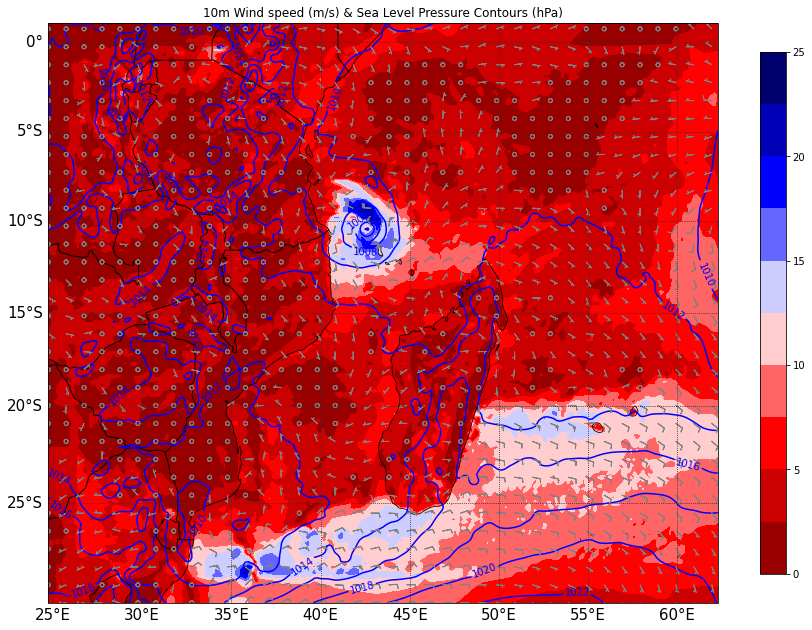

In [16]:
#!/usr/bin/env python
# coding: utf-8
# Import the tools needed :
#
#https://fabienmaussion.info/climate_system/week_04/01_Lesson_Wind-Derivatives-Integrals.html

from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import datetime #date time slicing/indexing
from netCDF4 import Dataset
import wrf
import xarray as xr
import numpy as np
import cartopy.crs as crs
import matplotlib
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import cartopy.feature as cfe

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

#Create sea level pressure and plot sea level pressure for a time slice

# Load the dataset
rep_data='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Kenneth/' #Home
ncfile = Dataset(rep_data+'wrfout_d01_07.nc')
#ncfile = Dataset('wrfout_v2_Lambert.nc')

# Get the variable
#slp = wrf.getvar(ncfile, "slp",timeidx=37)




#ncfile = ncfile_path #netCDF4.Dataset(ncfile_path)
# Get the Sea Level Pressure
slp = wrf.getvar(ncfile, "slp", timeidx=37, method="cat") #timeidx=wrf.ALL_TIMES
#slp = slp[time_slice_1]
# Smooth the sea level pressure since it tends to be noisy near the mountains
smooth_slp = smooth2d(slp, 3)

#get wind speed and components
wspd = getvar(ncfile, "uvmet10_wspd_wdir", units="m s-1", timeidx=37, method="cat")[0,:]
#wspd = wspd[time_slice_1]

u10 = getvar(ncfile, "uvmet10", units="m s-1", timeidx=37, method="cat")[0,:]
#u10 = u10[time_slice_1]

v10 = getvar(ncfile, "uvmet10", units="m s-1", timeidx=37, method="cat")[1,:]
#v10 = v10[time_slice_1]


# Get the latitude and longitude points
lats, lons = latlon_coords(slp)
# Get the cartopy mapping object
cart_proj = get_cartopy(slp)
# Create a figure
fig = plt.figure(figsize=(15,12))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)
# Download and add the states and coastlines
#states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
#                             name='admin_1_states_provinces_shp')
#ax.add_feature(states, linewidth=.5)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS)
#ax.coastlines(color='black');# 


#ax.coastlines('50m', linewidth=0.8)

# Make the contour outlines for the smoothed sea level pressure.
contours = plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="blue",
            transform=crs.PlateCarree())
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
# Add the wind speed contours
plt.contourf(to_np(lons), to_np(lats), to_np(wspd), 10, transform=crs.PlateCarree(),cmap='seismic_r')
             #cmap=get_cmap("rainbow"))

# Add a color bar
plt.colorbar(ax=ax, shrink=.8)

#Add wind barbs, only plotting every 15th data point.
barbNo=6
ax.barbs(to_np(lons[::barbNo,::barbNo]), to_np(lats[::barbNo,::barbNo]),
         to_np(u10[::barbNo,::barbNo]),to_np(v10[::barbNo,::barbNo]), sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
         transform=crs.PlateCarree(), barbcolor='grey', length=4, zorder=2)

# Set the map limits
ax.set_xlim(cartopy_xlim(smooth_slp))
ax.set_ylim(cartopy_ylim(smooth_slp))
# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS)
ax.coastlines('50m', linewidth=0.8) 




#Add labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.5, linestyle=':')
gl.top_labels = False
gl.right_labels = False
#Label style 
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

 
plt.title("10m Wind speed (m/s) & Sea Level Pressure Contours (hPa)") #timeidx + " " + 
plt.savefig(rep_data + "10mWS_SLP_Ken" + ".png", bbox_inches='tight')
plt.savefig(rep_data + "10mWS_SLP_Ken" + ".pdf", bbox_inches='tight')



In [20]:
#; Get non-convective, convective and total precipitation
  #rain_exp = wrf_user_getvar(a,"RAINNC",-1)
  #rain_con = wrf_user_getvar(a,"RAINC",-1)
  #rain_tot = rain_exp + rain_con
  #rain_tot@description = "Total Precipitation"


#ncfile = ncfile_path #netCDF4.Dataset(ncfile_path)
# Get the total precipitation

#get wind speed and components
#wrf.getvar(ncfile, "slp", timeidx=37, method="cat") 

rain_exp = wrf.getvar(ncfile, "RAINNC", timeidx=37, method="cat") #[0,:]

rain_con = wrf.getvar(ncfile, "RAINC", timeidx=37, method="cat") #[0,:]

rain_tot = rain_exp + rain_con
rain_tot

<xarray.DataArray (south_north: 195, west_east: 225)>
array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.9353306e-23, 2.7084611e-17, ..., 1.0231737e-13,
        4.3677093e-12, 0.0000000e+00],
       [0.0000000e+00, 4.3356100e-20, 3.7235623e-20, ..., 5.0116561e-17,
        5.0650536e-11, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 24.73 24.89 25.06 ... 62.11 62.27
    XLAT     (south_north, west_east) float32 -29.97 -29.97 ... 1.084 1.084
    XTIME    float32 6.66e+03
    Time     datetime64[ns] 2019-04-25T15:00:00
Dimensions without coordinates: south_north, west_east

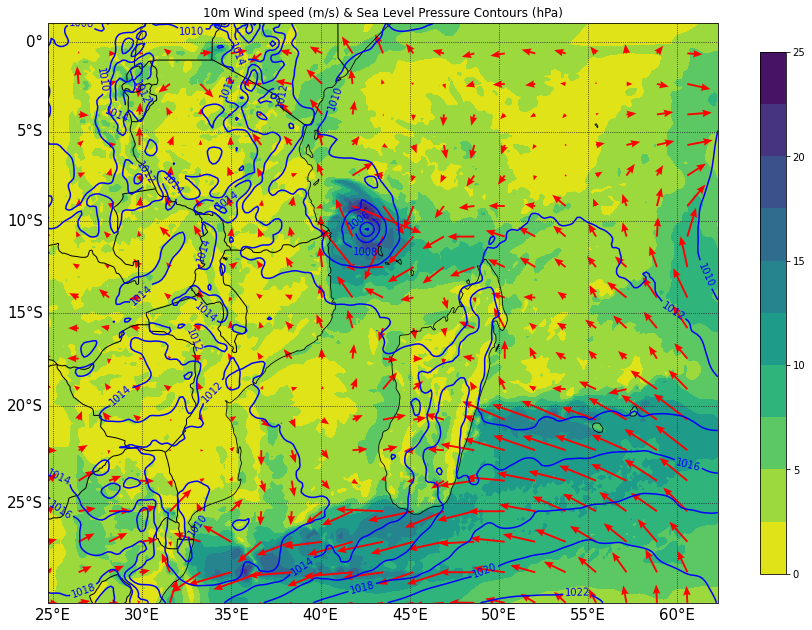

In [53]:
#!/usr/bin/env python
# coding: utf-8
# Import the tools needed :

from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import datetime #date time slicing/indexing
from netCDF4 import Dataset
import wrf
import xarray as xr
import numpy as np
import cartopy.crs as crs
import matplotlib
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import cartopy.feature as cfe

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

#Create sea level pressure and plot sea level pressure for a time slice

# Load the dataset
rep_data='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Kenneth/' #Home
ncfile = Dataset(rep_data+'wrfout_d01_07.nc')
#ncfile = Dataset('wrfout_v2_Lambert.nc')

# Get the variable
#slp = wrf.getvar(ncfile, "slp",timeidx=37)




#ncfile = ncfile_path #netCDF4.Dataset(ncfile_path)
# Get the Sea Level Pressure
slp = wrf.getvar(ncfile, "slp", timeidx=37, method="cat") #timeidx=wrf.ALL_TIMES
#slp = slp[time_slice_1]
# Smooth the sea level pressure since it tends to be noisy near the mountains
smooth_slp = smooth2d(slp, 3)

#get wind speed and components
wspd = getvar(ncfile, "uvmet10_wspd_wdir", units="m s-1", timeidx=37, method="cat")[0,:]
#wspd = wspd[time_slice_1]

u10 = getvar(ncfile, "uvmet10", units="m s-1", timeidx=37, method="cat")[0,:]
#u10 = u10[time_slice_1]

v10 = getvar(ncfile, "uvmet10", units="m s-1", timeidx=37, method="cat")[1,:]
#v10 = v10[time_slice_1]


# Get the latitude and longitude points
lats, lons = latlon_coords(slp)
# Get the cartopy mapping object
cart_proj = get_cartopy(slp)
# Create a figure
fig = plt.figure(figsize=(15,12))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)
# Download and add the states and coastlines
#states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
#                             name='admin_1_states_provinces_shp')
#ax.add_feature(states, linewidth=.5)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS)
#ax.coastlines(color='black');# 


#ax.coastlines('50m', linewidth=0.8)

# Make the contour outlines for the smoothed sea level pressure.
contours = plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="blue",
            transform=crs.PlateCarree())
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
# Add the wind speed contours
plt.contourf(to_np(lons), to_np(lats), to_np(wspd), 10, transform=crs.PlateCarree(),cmap='viridis_r')
             #cmap=get_cmap("rainbow"))

# Add a color bar
plt.colorbar(ax=ax, shrink=.8)

#Add wind barbs, only plotting every 15th data point.
#barbNo=6
#ax.barbs(to_np(lons[::barbNo,::barbNo]), to_np(lats[::barbNo,::barbNo]),
#         to_np(u10[::barbNo,::barbNo]),to_np(v10[::barbNo,::barbNo]), sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
#         transform=crs.PlateCarree(), barbcolor='grey', length=4, zorder=2)

#Add wind vectors
quiverNo=6
ax.quiver(to_np(lons[::quiverNo,::quiverNo]), to_np(lats[::quiverNo,::quiverNo]),
         to_np(u10[::quiverNo,::quiverNo]),to_np(v10[::quiverNo,::quiverNo]), 
         transform=crs.PlateCarree(),headwidth=4,color='r',regrid_shape=20) 



# Set the map limits
ax.set_xlim(cartopy_xlim(smooth_slp))
ax.set_ylim(cartopy_ylim(smooth_slp))
# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS)
ax.coastlines('50m', linewidth=0.8) 




#Add labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.5, linestyle=':')
gl.top_labels = False
gl.right_labels = False
#Label style 
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

 
plt.title("10m Wind speed (m/s) & Sea Level Pressure Contours (hPa)") #timeidx + " " + 
plt.savefig(rep_data + "10mWS_SLP_Ken-07" + ".png", bbox_inches='tight')
plt.savefig(rep_data + "10mWS_SLP_Ken-07" + ".pdf", bbox_inches='tight')







# Add the wind speed contours
#plt.contourf(to_np(lons), to_np(lats), to_np(rain_tot), 10, transform=crs.PlateCarree(),cmap='seismic_r')
             #cmap=get_cmap("rainbow"))

In [44]:
#!/usr/bin/env python
# coding: utf-8
# Import the tools needed :

from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import datetime #date time slicing/indexing
from netCDF4 import Dataset
import wrf
import xarray as xr
import numpy as np
import cartopy.crs as crs
import matplotlib
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import cartopy.feature as cfe

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

#Create sea level pressure and plot sea level pressure for a time slice

# Load the dataset
rep_data='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Kenneth/' #Home
ncfile = Dataset(rep_data+'wrfout_d01_07.nc')
#ncfile = Dataset('wrfout_v2_Lambert.nc')

# Get the variable
#slp = wrf.getvar(ncfile, "slp",timeidx=37)
rainc = ncfile.variables['RAINC']
rainnc = ncfile.variables['RAINNC']
times = ncfile.variables['Times']

print(rainc)

#wspd = getvar(ncfile, "RAINC", units="mm", timeidx=37, method="cat")[0,:]
if time ==0:
    prev_total=rainc[time]+rainnc[time]
else:
    prev_total=rainc[time-1]+rainnc[time-1]
    total_accum=rainc[time]+rainnc[time]
    precip_tend=total_accum - prev_total



'''

#ncfile = ncfile_path #netCDF4.Dataset(ncfile_path)
# Get the Sea Level Pressure
slp = wrf.getvar(ncfile, "slp", timeidx=37, method="cat") #timeidx=wrf.ALL_TIMES
#slp = slp[time_slice_1]
# Smooth the sea level pressure since it tends to be noisy near the mountains
smooth_slp = smooth2d(slp, 3)

#get wind speed and components
wspd = getvar(ncfile, "uvmet10_wspd_wdir", units="m s-1", timeidx=37, method="cat")[0,:]
#wspd = wspd[time_slice_1]

u10 = getvar(ncfile, "uvmet10", units="m s-1", timeidx=37, method="cat")[0,:]
#u10 = u10[time_slice_1]

v10 = getvar(ncfile, "uvmet10", units="m s-1", timeidx=37, method="cat")[1,:]
#v10 = v10[time_slice_1]


# Get the latitude and longitude points
lats, lons = latlon_coords(slp)
# Get the cartopy mapping object
cart_proj = get_cartopy(slp)
# Create a figure
fig = plt.figure(figsize=(15,12))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)
# Download and add the states and coastlines
#states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
#                             name='admin_1_states_provinces_shp')
#ax.add_feature(states, linewidth=.5)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS)
#ax.coastlines(color='black');# 


#ax.coastlines('50m', linewidth=0.8)

# Make the contour outlines for the smoothed sea level pressure.
contours = plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="blue",
            transform=crs.PlateCarree())
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")
# Add the wind speed contours
plt.contourf(to_np(lons), to_np(lats), to_np(wspd), 10, transform=crs.PlateCarree(),cmap='viridis_r')
             #cmap=get_cmap("rainbow"))

# Add a color bar
plt.colorbar(ax=ax, shrink=.8)

#Add wind barbs, only plotting every 15th data point.
barbNo=6
ax.barbs(to_np(lons[::barbNo,::barbNo]), to_np(lats[::barbNo,::barbNo]),
         to_np(u10[::barbNo,::barbNo]),to_np(v10[::barbNo,::barbNo]), sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
         transform=crs.PlateCarree(), barbcolor='grey', length=4, zorder=2)

# Set the map limits
ax.set_xlim(cartopy_xlim(smooth_slp))
ax.set_ylim(cartopy_ylim(smooth_slp))
# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS)
ax.coastlines('50m', linewidth=0.8) 




#Add labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.5, linestyle=':')
gl.top_labels = False
gl.right_labels = False
#Label style 
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

 
plt.title("10m Wind speed (m/s) & Sea Level Pressure Contours (hPa)") #timeidx + " " + 
plt.savefig(rep_data + "10mWS_SLP_Ken-07" + ".png", bbox_inches='tight')
plt.savefig(rep_data + "10mWS_SLP_Ken-07" + ".pdf", bbox_inches='tight')







# Add the wind speed contours
#plt.contourf(to_np(lons), to_np(lats), to_np(rain_tot), 10, transform=crs.PlateCarree(),cmap='seismic_r')
             #cmap=get_cmap("rainbow"))
             
             
'''             

<class 'netCDF4._netCDF4.Variable'>
float32 RAINC(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: ACCUMULATED TOTAL CUMULUS PRECIPITATION
    units: mm
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (41, 195, 225)
filling on, default _FillValue of 9.969209968386869e+36 used


NameError: name 'time' is not defined